### 기술 지원 데이터는 종종 고객 경험 개선 기회에 대한 풍부한 정보 소스가 될 수 있습니다. 제품에 대한 고객의 문제가 적을수록 좋습니다. 고객이 최소한의 노력으로 기술적 과제를 신속하게 극복 할 수 있다면 더욱 좋습니다. 기술 지원 데이터를 분석하고 문제 유형, 문제 해결 시간 및 가장 적합한 지원 채널에 대한 기본적인 분석을 수행하겠습니다.

## technical_support_data.csv 파일을 통해, 비슷한 유형의 문제들을 도출하시오.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/technical_support_data.csv')

In [4]:
df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [5]:
df.head(3)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10


In [7]:
df.isna().sum()

PROBLEM_TYPE             0
no_of_cases              0
Avg_pending_calls        0
Avg_resol_time           0
recurrence_freq          0
Replace_percent          0
In_warranty_percent      0
Post_warranty_percent    0
dtype: int64

In [8]:
X = df.loc[:,'no_of_cases':'Post_warranty_percent']

In [10]:
X.head(3)

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.0,75,25
1,12,2.0,150,0.01,0.5,5,95
2,5,1.0,35,0.02,0.2,90,10


In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3, random_state= 10)

In [14]:
y_pred = kmeans.fit_predict(X)

C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
y_pred

array([0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2,
       2], dtype=int32)

In [16]:
df['Group'] = y_pred

In [17]:
df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,2
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,2
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,2
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,2
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,1
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,2


In [20]:
df.loc[df['Group'] == 1, ]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
8,Unable to connect the App to the device,321,1.0,5,0.21,0.0,60,40,1
14,Remote Keys get stuck,450,1.0,8,0.25,0.0,100,0,1
15,Unable to operate menu from remote,520,1.0,7,0.28,0.0,100,0,1
16,Motor noise from the system,390,1.0,9,0.27,0.0,5,95,1


In [34]:
wcss = []
for k in range(1, 10+1):
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

In [35]:
wcss

[666888.109626087,
 235660.1862872549,
 148952.65626166665,
 115863.02039166665,
 71210.34365476192,
 56290.83186666667,
 44666.429541666665,
 36204.21809166666,
 24910.04774166667,
 22522.549666666666]

In [36]:
df_wcss = pd.Series(wcss, index=range(1,10+1))

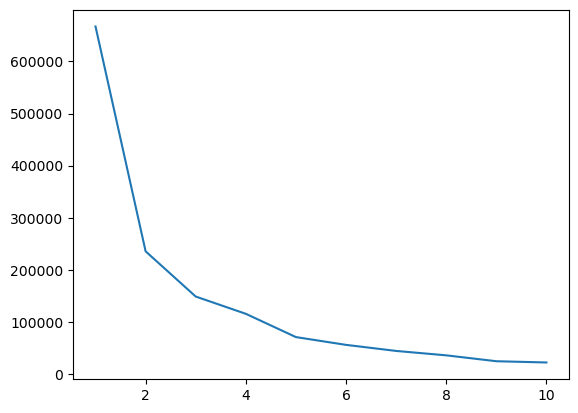

In [48]:
df_wcss.plot()
plt.show()

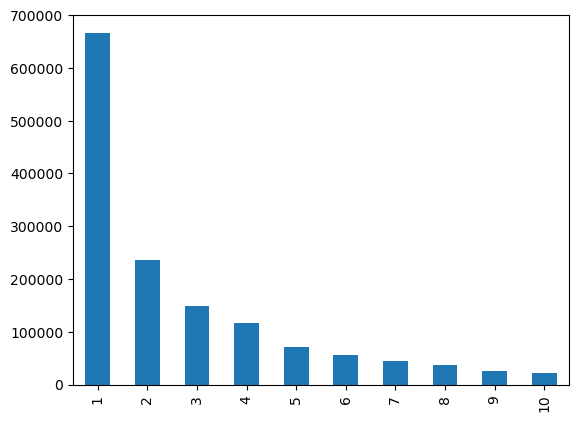

In [49]:
df_wcss.plot(kind = 'bar')
plt.show()

In [54]:
kmeans = KMeans(n_clusters=5, random_state=5)

In [55]:
y_pred = kmeans.fit_predict(X)

C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
df['Group'] = y_pred

In [58]:
df.loc[df['Group'] == 2, ]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,2
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,2
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,2
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,2
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,2


In [118]:
# 실습2

In [222]:
df = pd.read_csv('../data/food_delivery_customer_dataset_original.csv')

In [223]:
df.head(3)

,customer_id,order_count,total_quantity,total_spent,avg_order_time,favorite_category,region,avg_reorder_cycle_days
0,CUST_1,5,1,14753,1,피자,성동구,23
1,CUST_2,8,1,10600,1,야식,송파구,17
2,CUST_3,3,2,21042,22,피자,마포구,13


In [224]:
df.isna().sum()

customer_id               0
order_count               0
total_quantity            0
total_spent               0
avg_order_time            0
favorite_category         0
region                    0
avg_reorder_cycle_days    0
dtype: int64

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             1600 non-null   object
 1   order_count             1600 non-null   int64 
 2   total_quantity          1600 non-null   int64 
 3   total_spent             1600 non-null   int64 
 4   avg_order_time          1600 non-null   int64 
 5   favorite_category       1600 non-null   object
 6   region                  1600 non-null   object
 7   avg_reorder_cycle_days  1600 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 100.1+ KB


In [226]:
df['favorite_category'].unique()

array(['피자', '야식', '치킨', '한식', '중식', '분식', '족발/보쌈', '일식', '프리미엄 스테이크',
       '프리미엄 해산물', '양식'], dtype=object)

In [227]:
df['region'].unique()

array(['성동구', '송파구', '마포구', '용산구', '강남구'], dtype=object)

In [228]:
X = df.loc[:,'order_count': ]

In [229]:
X.head(3)

,order_count,total_quantity,total_spent,avg_order_time,favorite_category,region,avg_reorder_cycle_days
0,5,1,14753,1,피자,성동구,23
1,8,1,10600,1,야식,송파구,17
2,3,2,21042,22,피자,마포구,13


In [230]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [231]:
from sklearn.compose import ColumnTransformer

In [232]:
ct = ColumnTransformer( [ ('scaler', MinMaxScaler(), [0, 1, 2, 3, 6]),
                          ('onehot', OneHotEncoder(), [4, 5] ) ] )

In [233]:
X = ct.fit_transform(X)

In [234]:
from sklearn.cluster import KMeans

In [235]:
kmeans = KMeans(n_clusters= 7, random_state=10)

In [236]:
y_pred = kmeans.fit_predict(X)

In [237]:
df['Group'] = y_pred

In [238]:
wcss = []
for k in range(1, 10+1):
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [239]:
wcss

[3390.872776097337,
 3057.8813060021566,
 2744.713113952789,
 2424.445445522795,
 2104.759296066477,
 2053.591693166245,
 1988.7233497893535,
 1978.0059649367183,
 1924.974610517599,
 1886.4211175762907]

In [240]:
df_wcss = pd.Series(wcss, index=range(1,10+1))

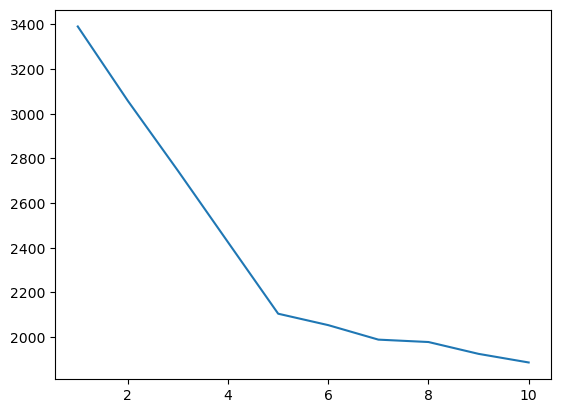

In [241]:
df_wcss.plot()
plt.show()

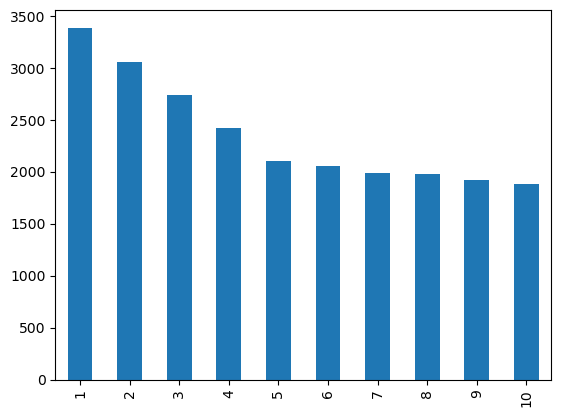

In [242]:
df_wcss.plot(kind = 'bar')
plt.show()

In [243]:
kmeans = KMeans(n_clusters=5, random_state=5)

In [244]:
y_pred = kmeans.fit_predict(X)

In [245]:
df['Group'] = y_pred

In [251]:
df.loc[df['Group'] == 0, 'region' ].unique()

array(['강남구'], dtype=object)

In [252]:
df.loc[df['Group'] == 1, 'region' ].unique()

array(['성동구'], dtype=object)

In [246]:
df.loc[df['Group'] == 2, 'region' ].unique()

array(['마포구'], dtype=object)

In [250]:
df.loc[df['Group'] == 3, 'region' ].unique()

array(['용산구'], dtype=object)

In [ ]:
# 1. egion 컬럼을 제외하고 클러스터링 한다.
# 2. silhouette 실루엣 스코어를 계산한다.

silhouette 실루엣 스코어 계산

In [247]:
from sklearn.metrics import silhouette_score

In [248]:
score_list = []
for k in range(2,10+1):  # 실루엣 스코어 구할 때 클러스터 2개 이상으로 넣어줘야 한다.
    kmeans = KMeans(n_clusters=k, random_state=5)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)
    score_list.append(score)

실루엣 스코어는 -1~1 사이의 숫자이고 1에 가까울 수록 군집이 잘 뭉쳐있는 것이다.

In [249]:
score_list

[0.10489486830735664,
 0.1526280380096412,
 0.20238108998157764,
 0.25324640702872914,
 0.2111031131738809,
 0.1895633307946937,
 0.17954189144933277,
 0.16642557791603352,
 0.14898665633111963]

In [253]:
df

,customer_id,order_count,total_quantity,total_spent,avg_order_time,favorite_category,region,avg_reorder_cycle_days,Group
0,CUST_1,5,1,14753,1,피자,성동구,23,1
1,CUST_2,8,1,10600,1,야식,송파구,17,4
2,CUST_3,3,2,21042,22,피자,마포구,13,2
3,CUST_4,8,1,9553,23,피자,성동구,28,1
4,CUST_5,1,1,13534,0,야식,마포구,8,2
...,...,...,...,...,...,...,...,...,...
1595,CUST_1596,4,4,222628,18,일식,송파구,20,4
1596,CUST_1597,4,2,89576,18,프리미엄 해산물,송파구,11,4
1597,CUST_1598,8,2,89414,19,프리미엄 해산물,용산구,21,3
1598,CUST_1599,10,3,176712,19,프리미엄 스테이크,마포구,23,2


In [255]:
X = df.drop( ['customer_id', 'region'], axis=1 )

In [256]:
X.head(3)

,order_count,total_quantity,total_spent,avg_order_time,favorite_category,avg_reorder_cycle_days,Group
0,5,1,14753,1,피자,23,1
1,8,1,10600,1,야식,17,4
2,3,2,21042,22,피자,13,2


In [257]:
ct = ColumnTransformer( [ ( 'onhot', OneHotEncoder(), [4] ) ,
                          ( 'scaler', MinMaxScaler(), [0,1,2,3,5] ) ] )

In [259]:
X = ct.fit_transform(X)

In [261]:
wcss = []
score_list =[]
for k in range(2, 10+1):
    kmeans = KMeans(n_clusters=k, random_state=5)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)
    score_list.append(score)
    wcss.append( kmeans.inertia_ )

In [264]:
wcss #차트 그려야함(엘보우)

[1850.0742581188658,
 1687.4224799075598,
 1477.553027116431,
 1275.8976277562786,
 1168.5864204049335,
 988.6471144334407,
 849.4670785272119,
 743.2384865793715,
 629.0108676966993]

In [265]:
score_list #1로 갈 수록 좋은 거(가장  큰 값 찾으면 됨)

[0.12992839732677378,
 0.15803930872029748,
 0.22033559965974658,
 0.2885335524244872,
 0.3139397695795816,
 0.36994191732201714,
 0.41398847174229503,
 0.44972308750800494,
 0.4878311168158012]

In [266]:
df_wcss = pd.Series(wcss, index=range(2, 10+1))

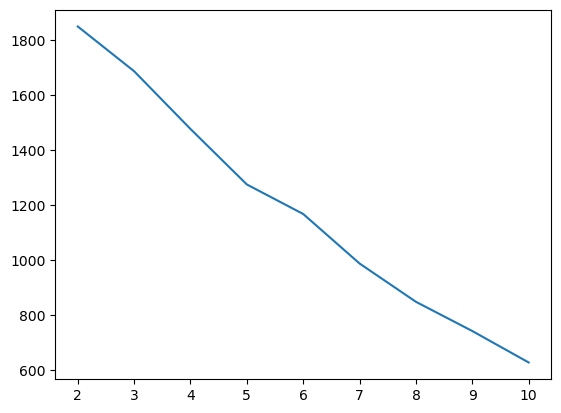

In [268]:
df_wcss.plot()
plt.show()